In [1]:
import os
os.chdir('/Users/czarrar/Dropbox/Circle/Jerb/recipe_rec/code')

In [2]:
import libs_recipe_recs
import numpy as np
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
# We load in our prior model
recs = libs_recipe_recs.RecipeRec.load_model('z_model.p')

In [51]:
# These are the recipes
recipes = recs.recipes
recipes.head()

,recipe_id,ave_rating,num_reviews,name,ingredients,img_path
0,240488,4.764706,29,"Pork Loin, Apples, and Sauerkraut","sauerkraut drained, Granny Smith apples sliced...",../data/RecSys/core_images/240488.jpg
1,218939,4.571429,12,Foolproof Rosemary Chicken Wings,"chicken wings, sprigs rosemary, head garlic, o...",../data/RecSys/core_images/218939.jpg
2,87211,4.625000,163,Chicken Pesto Paninis,"focaccia bread quartered, prepared basil pesto...",../data/RecSys/core_images/87211.jpg
3,245714,4.500000,2,Potato Bacon Pizza,"red potatoes, strips bacon, Sauce:, heavy whip...",../data/RecSys/core_images/245714.jpg
4,218545,4.605769,85,Latin-Inspired Spicy Cream Chicken Stew,"skinless boneless chicken breast halves, diced...",../data/RecSys/core_images/218545.jpg


In [6]:
# These are the tfidf features
recs.model.features.shape

(45630, 3995)

In [50]:
features = recs.model.features
features.to_pickle('z_features.pickle')

# PCA

* GOAL: Compress the feature dimensions to make it more manageable for future clustering and analysis
* ACTION: Run a PCA and select the number of components that explain 95% of the variance


In [9]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(recs.model.features)

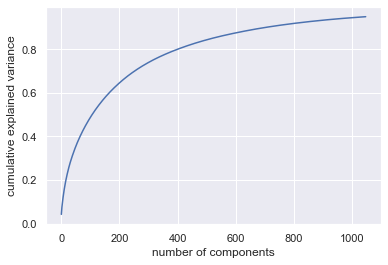

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

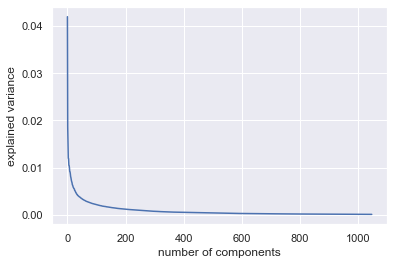

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance');

In [12]:
X_reduced.shape

(45630, 1049)

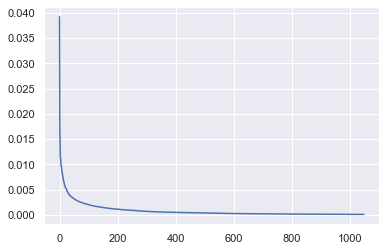

# Visualize with t-SNE

* GOAL: Project the data into 2D in order to see rough structure
* ACTION: Use t-SNE with original and PCA data

In [13]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(X_reduced[:,:50])

# DBScan

In [176]:
from sklearn.cluster import DBSCAN

In [177]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_reduced)

KeyboardInterrupt: 

# Clustering with K-Means

In [11]:
#from sklearn.cluster import OPTICS
#clustering = OPTICS(min_samples=10).fit(X_reduced[:,:50])

In [31]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

## Speed

In [26]:
%%timeit
kmeans = MiniBatchKMeans(n_clusters=5)
kmeans.fit(X_reduced[:,:100])

203 ms ± 83.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
kmeans = MiniBatchKMeans(n_clusters=5)
kmeans.fit(X_reduced[:,:400])

454 ms ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
kmeans = MiniBatchKMeans(n_clusters=5)
kmeans.fit(X_reduced)

1.03 s ± 201 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Determine the Number of Clusters

In [28]:
kmeans = MiniBatchKMeans(n_clusters=5)
kmeans.fit(X_reduced)

MiniBatchKMeans(n_clusters=5)

In [30]:
kmeans.labels_.shape

(45630,)

In [20]:
silhouette_score(X_reduced, kmeans.labels_)

0.02851708700208787

### Many Clusters

In [13]:
nclusts = list(range(1,21)) + [25,30,40,50,60,80,100]
clust_labels = []

for k in nclusts:
    print('clust: ', k)
    # Compute clusters
    kmeans = MiniBatchKMeans(n_clusters=k)
    kmeans.fit(X_reduced)
    # Save
    clust_labels.append(kmeans.labels_)

clust:  1
clust:  2
clust:  3
clust:  4
clust:  5
clust:  6
clust:  7
clust:  8
clust:  9
clust:  10
clust:  11
clust:  12
clust:  13
clust:  14
clust:  15
clust:  16
clust:  17
clust:  18
clust:  19
clust:  20
clust:  25
clust:  30
clust:  40
clust:  50
clust:  60
clust:  80
clust:  100


### Silhouette Width

In [15]:
avg_scores = [] 
for clabs in clust_labels[1:]:
    ss = silhouette_score(X_reduced, clabs)
    print('clust', np.max(clabs)+1, '- silhouette score:', ss)
    avg_scores.append(ss)

clust 2 - silhouette score: 0.03343530644299473
clust 3 - silhouette score: 0.027275654981588918
clust 4 - silhouette score: 0.015150647809189491
clust 5 - silhouette score: 0.022793481409427038
clust 6 - silhouette score: 0.021121130405161115
clust 7 - silhouette score: 0.013051393516968851
clust 8 - silhouette score: 0.017278979644336997
clust 9 - silhouette score: 0.018884413931364006
clust 10 - silhouette score: 0.020463299734671814
clust 11 - silhouette score: 0.012397215066737638
clust 12 - silhouette score: 0.02034136229916153
clust 13 - silhouette score: 0.018274714694805513
clust 14 - silhouette score: 0.015019497339400929
clust 15 - silhouette score: 0.014890920657594661
clust 16 - silhouette score: 0.021951422059431954
clust 17 - silhouette score: 0.008178690025511071
clust 18 - silhouette score: 0.025347329528884133
clust 19 - silhouette score: 0.01853100925357968
clust 20 - silhouette score: 0.0015283474275240177
clust 25 - silhouette score: 0.025329720544680624
clust 30 -

## Choose 25

25# of clusters has a decent S score. Let's go with that.

In [34]:
from sklearn.metrics import pairwise_distances

In [32]:
kmeans = MiniBatchKMeans(n_clusters=25)
kmeans.fit(X_reduced)

MiniBatchKMeans(n_clusters=25)

In [39]:
kmeans.cluster_centers_.shape

(25, 1049)

In [40]:
dmat = pairwise_distances(X_reduced, kmeans.cluster_centers_, metric='cosine')

In [55]:
# Most representative element
inds = np.argmin(dmat, axis=0)
recipes.loc[inds,["name","ingredients"]]

,name,ingredients
1990,Chef John's Chicken Cacciatore,"olive oil, roasting chicken, large onion, fres..."
40949,Apple Cider Chicken Marinade,"white wine, extra-virgin olive oil, fresh lemo..."
18765,French Silk Chocolate Pie II,"butter, white sugar, unsweetened cocoa powder,..."
8899,Stuffed Pasta Shells Surprise,"jumbo pasta shells, ground beef, cooking spray..."
40191,Chocolate Waffles I,"all-purpose flour, baking powder, salt, white ..."
31431,Chocolate Butter-Creme Frosting,"confectioners' sugar, butter, salt, squares un..."
23136,Cowboy Cookies III,"all-purpose flour, baking powder, baking soda,..."
43815,Kitty Kisses,"wet cat food, catnip (optional)"
43722,Texas Tea III,"fluid ounce vodka, fluid ounce amber rum, flui..."
23702,Grandma's Float,"all-purpose flour, white sugar, egg yolks, mil..."


In [ ]:
plt.plot(nclusts[1:], avg_scores)
plt.xlabel('number of clusters')
plt.ylabel('average silhouette score');

### Save

In [65]:
import pandas as pd

In [69]:
pd.Series(kmeans.labels_).value_counts()

7     8871
0     5014
1     4292
17    2868
16    2772
3     2422
9     2377
18    2306
15    2105
19    1958
24    1475
10    1454
20    1283
4     1183
6     1072
12    1071
14    1001
13     781
22     649
11     542
23      52
5       33
2       26
21      15
8        8
dtype: int64

In [81]:
(kmeans.labels_+1).tofile('z_kmeans25.txt', sep=" ")

In [82]:
np.loadtxt('z_kmeans25.txt')

array([12.,  8., 18., ..., 23., 23.,  2.])

# Play

The goal will be to first select a set of k items to show a user. Another goal will be to pair those items in the most informative way possible. For now, we will keep it simple.

In [118]:
recipes['group'] = pd.Series(kmeans.labels_
recipes.head()

,recipe_id,ave_rating,num_reviews,name,ingredients,img_path,group
0,240488,4.764706,29,"Pork Loin, Apples, and Sauerkraut","sauerkraut drained, Granny Smith apples sliced...",../data/RecSys/core_images/240488.jpg,11
1,218939,4.571429,12,Foolproof Rosemary Chicken Wings,"chicken wings, sprigs rosemary, head garlic, o...",../data/RecSys/core_images/218939.jpg,7
2,87211,4.625000,163,Chicken Pesto Paninis,"focaccia bread quartered, prepared basil pesto...",../data/RecSys/core_images/87211.jpg,17
3,245714,4.500000,2,Potato Bacon Pizza,"red potatoes, strips bacon, Sauce:, heavy whip...",../data/RecSys/core_images/245714.jpg,13
4,218545,4.605769,85,Latin-Inspired Spicy Cream Chicken Stew,"skinless boneless chicken breast halves, diced...",../data/RecSys/core_images/218545.jpg,24


In [119]:
ugrps = np.unique(recipes.group)
ugrps.sort()
ngrps = len(ugrps)
print(ngrps)

25


In [160]:
recipes['group'] = recipes.group.astype('category')

In [172]:
recipes.group.cat.categories

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [135]:
k = 10 # must be even (if no, will just round up)

In [151]:
if (k % 2) > 0:
    print('Setting k = k + 1')
    k = k + 1

In [173]:
grps = np.random.choice(recipes.group.cat.categories, k)
grps

array([13,  9, 14, 18,  4, 12, 20,  1, 14, 11])

In [154]:
inds = []
for g in grps:
    inds.append(np.random.choice(recipes.index[recipes.group==g], 1)[0])
inds = np.random.permutation(inds)
inds

array([42610,  5548, 32845,  2078, 23545, 38421,  6063,  8840,  7744,
       25258])

In [155]:
pairs = inds.reshape((k//2, 2))
pairs

array([[42610,  5548],
       [32845,  2078],
       [23545, 38421],
       [ 6063,  8840],
       [ 7744, 25258]])

In [166]:
tmp = pd.Series(kmeans.labels_, dtype="category")
tmp

0        11
1         7
2        17
3        13
4        24
         ..
45625    12
45626     9
45627    22
45628    22
45629     1
Length: 45630, dtype: category
Categories (25, int64): [0, 1, 2, 3, ..., 21, 22, 23, 24]

In [175]:
recipes.iloc[inds,:]

,recipe_id,ave_rating,num_reviews,name,ingredients,img_path,group
42610,49932,4.400000,66,Lentil Cakes (Patties),"dry brown lentils, water, milk, wheat and barl...",../data/RecSys/core_images/49932.jpg,23
5548,18216,4.686275,41,Calico Beans,"bacon, lean ground beef, onion, lima beans dra...",../data/RecSys/core_images/18216.jpg,24
32845,239953,4.375000,12,Pizza Spaghetti Casserole,"spaghetti, ground beef, milk, egg, pasta sauce...",../data/RecSys/core_images/239953.jpg,3
2078,115014,4.566667,24,Venison and Wild Rice Stuffed Acorn Squash,"wild rice, water, acorn squash halved and seed...",../data/RecSys/core_images/115014.jpg,15
23545,19227,4.672897,85,Oatmeal Raisin Toffee Cookies,"butter, brown sugar, white sugar, eggs, vanill...",../data/RecSys/core_images/19227.jpg,6
38421,88901,4.172414,77,Italian Zucchini Saute,"olive oil, small white onion, diced tomatoes w...",../data/RecSys/core_images/88901.jpg,7
6063,232107,3.500000,3,Quick Mango Chicken Curry,"vegetable oil, large onion, green bell pepper,...",../data/RecSys/core_images/232107.jpg,18
8840,18004,4.189189,30,Brandi's Best Burgers,"lean ground beef, dry onion soup mix, water, h...",../data/RecSys/core_images/18004.jpg,23
7744,15158,4.365592,151,Creamy Chicken and Rice Soup,"chopped celery, chopped onion, uncooked brown ...",../data/RecSys/core_images/15158.jpg,11
25258,18460,4.636364,11,Microwave Chocolate Pie,"pie shell baked, white sugar, cornstarch, unsw...",../data/RecSys/core_images/18460.jpg,2


In [121]:
# You will want some kind of database now?
# I don't think you need anything about what was sent out
# Only when it comes back, then you can record that in for a person

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [122]:
# Maybe for now let's not worry about showing any repeats
# Let's just show what we can

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int32)

array([3, 2])